In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_normalize = pd.read_csv('/Users/Serra/Desktop/bitirme/normalized_data.csv')
df_normalize

,Mekan_Adı,Puan_normalized,Restoran_Toplam_Yorum_Sayısı_normalized,sentiment_score_normalized,Tat_normalized,Hizmet_normalized,Ortam_normalized,Fiyat-Performans_normalized,Menü Çeşitliliği_normalized,Temizlik_normalized,Il,Ilce
0,aynen_street_food,1.0,0.012624,0.997103,0.171429,NaN,NaN,NaN,NaN,NaN,Ankara,Çankaya
1,aynen_street_food,1.0,0.012624,0.998424,0.190476,0.235294,1.0,NaN,NaN,NaN,Ankara,Çankaya
2,aynen_street_food,1.0,0.012624,0.967116,0.190476,NaN,NaN,NaN,NaN,NaN,Ankara,Çankaya
3,aynen_street_food,1.0,0.012624,0.977331,0.190476,NaN,NaN,NaN,NaN,NaN,Ankara,Çankaya
4,aynen_street_food,1.0,0.012624,0.011592,0.180952,NaN,NaN,NaN,0.15,NaN,Ankara,Çankaya
...,...,...,...,...,...,...,...,...,...,...,...,...
27097,aynen_street_food,1.0,0.012624,0.861105,0.171429,NaN,0.4,NaN,NaN,NaN,Ankara,Çankaya
27098,aynen_street_food,1.0,0.012624,0.992976,0.171429,NaN,NaN,NaN,0.90,NaN,Ankara,Çankaya
27099,aynen_street_food,1.0,0.012624,0.912485,0.190476,0.235294,NaN,NaN,NaN,NaN,Ankara,Çankaya
27100,aynen_street_food,1.0,0.012624,0.103208,0.180952,NaN,0.9,NaN,NaN,NaN,Ankara,Çankaya


### BURADA TÜM DATA ÜZERİNDEN BİR DAĞILIM HİSTOGRAMI ÇİZDİRDİM


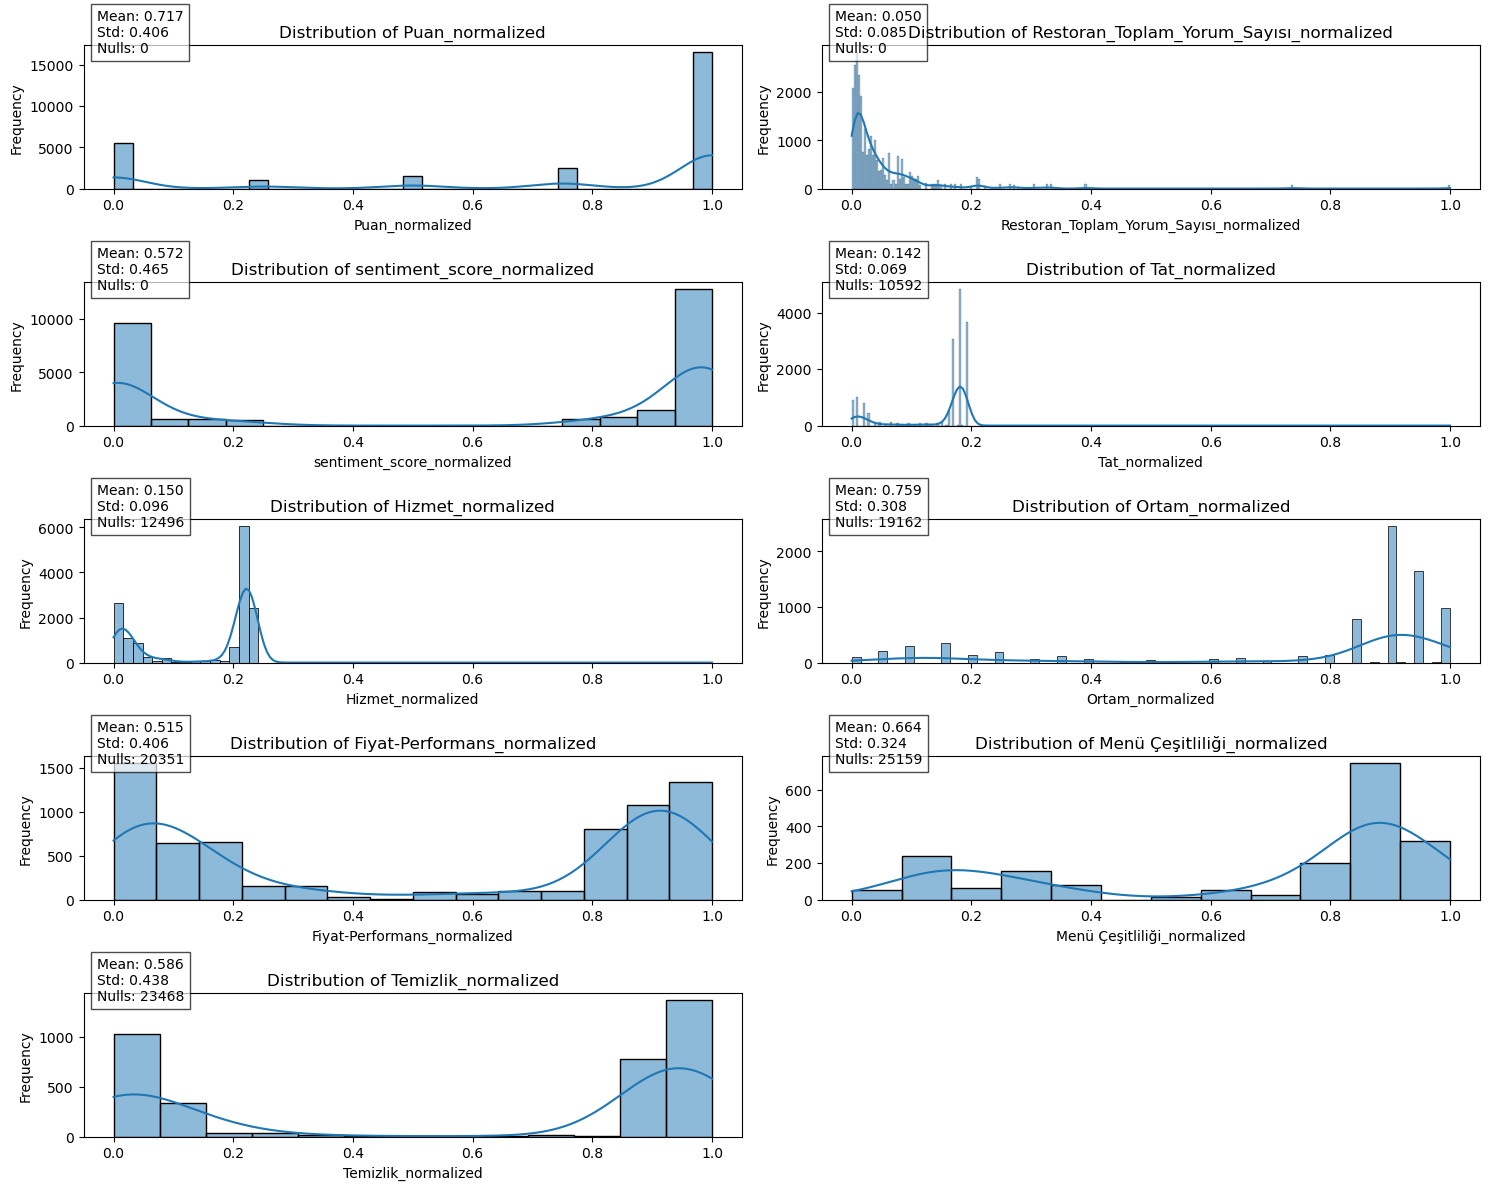

In [3]:
plt.figure(figsize=(15, 12))

# Select only numeric columns from df_normalize
numeric_cols = df_normalize.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(numeric_cols) + 1) // 2

# Create histograms for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Handle null values
    data = df_normalize[col].dropna()
    
    # Create histogram
    sns.histplot(data, kde=True)
    
    # Add title and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Add stats to the plot
    plt.text(0.02, 0.95, f"Mean: {data.mean():.3f}\nStd: {data.std():.3f}\nNulls: {df_normalize[col].isna().sum()}", 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

Quantile Statistics for Normalized Features:
--------------------------------------------------------------------------------


,Min,Q1 (25%),Mean (50%),Q3 (75%),Max
Fiyat-Performans_normalized,0.0,0.100000,0.514624,0.900000,1.0
Hizmet_normalized,0.0,0.023529,0.150494,0.223529,1.0
Menü Çeşitliliği_normalized,0.0,0.300000,0.663690,0.900000,1.0
Ortam_normalized,0.0,0.800000,0.759430,0.950000,1.0
Puan_normalized,0.0,0.500000,0.716820,1.000000,1.0
Restoran_Toplam_Yorum_Sayısı_normalized,0.0,0.009826,0.050238,0.061101,1.0
Tat_normalized,0.0,0.133333,0.141887,0.180952,1.0
Temizlik_normalized,0.0,0.050000,0.585732,0.950000,1.0
sentiment_score_normalized,0.0,0.001363,0.571519,0.991267,1.0


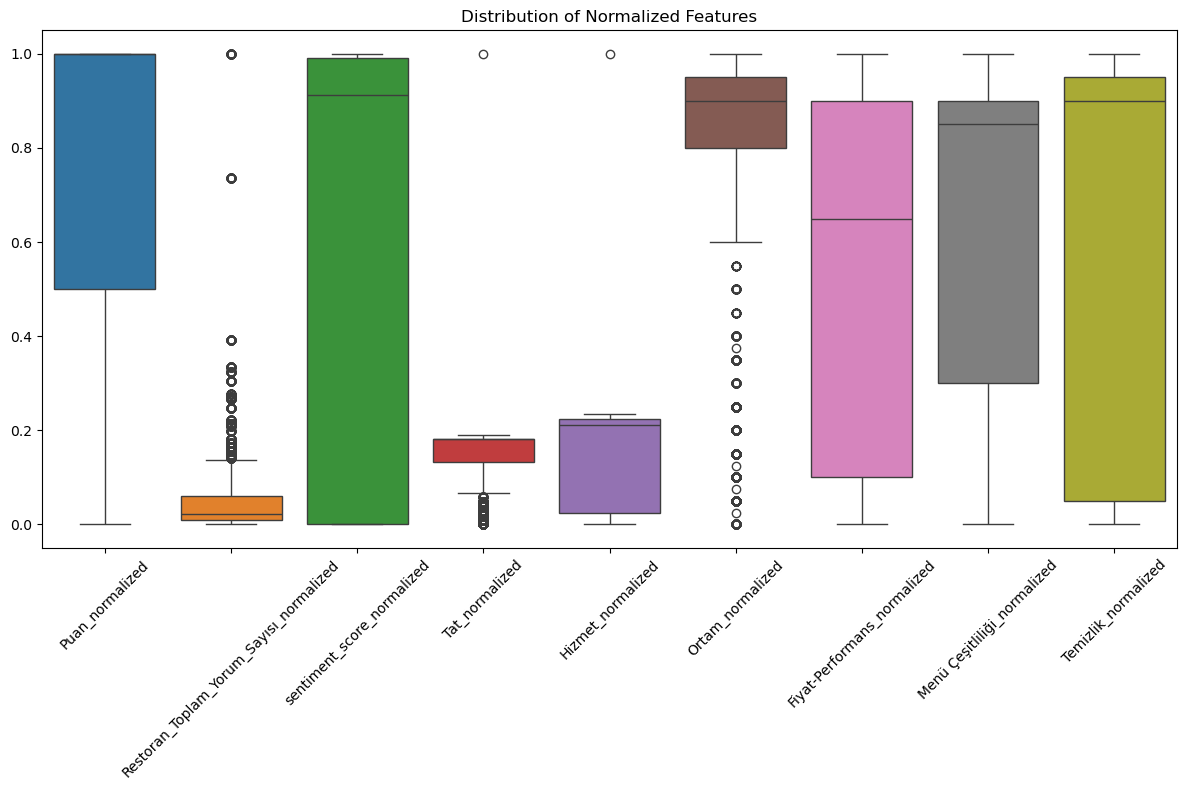

In [4]:
# Calculate quantile statistics for normalized features
quantile_stats = pd.DataFrame({
    'Min': df_normalize.select_dtypes(include=['float64']).min(),
    'Q1 (25%)': df_normalize.select_dtypes(include=['float64']).quantile(0.25),
    'Mean (50%)': df_normalize.select_dtypes(include=['float64']).mean(),
    'Q3 (75%)': df_normalize.select_dtypes(include=['float64']).quantile(0.75),
    'Max': df_normalize.select_dtypes(include=['float64']).max(),
})

# Sort by column names
quantile_stats = quantile_stats.sort_index()

# Display the statistics
print("Quantile Statistics for Normalized Features:")
print("-" * 80)
display(quantile_stats)

# Create a boxplot visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalize.select_dtypes(include=['float64']))
plt.xticks(rotation=45)
plt.title('Distribution of Normalized Features')
plt.tight_layout()
plt.show()

In [5]:
# Group by restaurant name and calculate mean of numeric columns only
restaurant_groups = df_normalize.groupby('Mekan_Adı').agg({
	'Puan_normalized': 'mean',
	'Restoran_Toplam_Yorum_Sayısı_normalized': 'mean',
	'sentiment_score_normalized': 'mean',
	'Tat_normalized': 'mean',
	'Hizmet_normalized': 'mean',
	'Ortam_normalized': 'mean',
	'Fiyat-Performans_normalized': 'mean',
	'Menü Çeşitliliği_normalized': 'mean',
	'Temizlik_normalized': 'mean',
	'Il': lambda x: x.mode()[0] if not x.mode().empty else None,
	'Ilce': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

# Display the first few rows of the aggregated data
restaurant_groups.head()

,Mekan_Adı,Puan_normalized,Restoran_Toplam_Yorum_Sayısı_normalized,sentiment_score_normalized,Tat_normalized,Hizmet_normalized,Ortam_normalized,Fiyat-Performans_normalized,Menü Çeşitliliği_normalized,Temizlik_normalized,Il,Ilce
0,01_adana_durumluk,0.726852,0.006312,0.483109,0.136905,0.066667,0.850,0.575000,NaN,1.00,Ankara,Etimesgut
1,01_adanali_ismail_ustanin_yeri,0.610795,0.048998,0.454514,0.142476,0.115809,0.718,0.236667,0.392105,0.47,Ankara,Çankaya
2,06_ankara_kokorec,0.856250,0.003384,0.716910,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Pursaklar
3,1983beyoglu_cikolatakahve_kecioren,0.836207,0.003969,0.731472,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Keçiören
4,19_pide_kebap_ustanin_yeri,0.805556,0.007743,0.514517,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Kahramankazan


In [6]:
# Calculate mean and standard deviation for Restaurant Groups
norm_stats = pd.DataFrame({
    'Mean': restaurant_groups.select_dtypes(include=['float64']).mean(),
    'Std Dev': restaurant_groups.select_dtypes(include=['float64']).std(),
    'Min': restaurant_groups.select_dtypes(include=['float64']).min(),
    'Q1 (25%)': restaurant_groups.select_dtypes(include=['float64']).quantile(0.25),
    'Median (50%)': restaurant_groups.select_dtypes(include=['float64']).median(),
    'Q3 (75%)': restaurant_groups.select_dtypes(include=['float64']).quantile(0.75),
    'Max': restaurant_groups.select_dtypes(include=['float64']).max(),
})

# Ensure numeric dtype
norm_stats = norm_stats.apply(pd.to_numeric, errors="coerce")

# Sort by column names
norm_stats = norm_stats.sort_index()

print("Statistics for Normalized Features for restaurant groups:")
print("-" * 80)

# Option 1: Global pandas formatting
pd.set_option('display.float_format', '{:.2f}'.format)
print(norm_stats)    # <-- will show 2 decimal places
pd.reset_option('display.float_format')

# Option 2: Explicit rounding (better in Jupyter)
display(norm_stats.round(2))


Statistics for Normalized Features for restaurant groups:
--------------------------------------------------------------------------------
                                         Mean  Std Dev  Min  Q1 (25%)  \
Fiyat-Performans_normalized              0.55     0.24 0.00      0.38   
Hizmet_normalized                        0.16     0.05 0.00      0.12   
Menü Çeşitliliği_normalized              0.68     0.22 0.00      0.55   
Ortam_normalized                         0.76     0.15 0.10      0.69   
Puan_normalized                          0.74     0.19 0.00      0.63   
Restoran_Toplam_Yorum_Sayısı_normalized  0.04     0.08 0.00      0.00   
Tat_normalized                           0.14     0.03 0.00      0.12   
Temizlik_normalized                      0.63     0.28 0.00      0.42   
sentiment_score_normalized               0.60     0.21 0.00      0.46   

                                         Median (50%)  Q3 (75%)  Max  
Fiyat-Performans_normalized                      0.55      

,Mean,Std Dev,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Fiyat-Performans_normalized,0.55,0.24,0.0,0.38,0.55,0.74,1.00
Hizmet_normalized,0.16,0.05,0.0,0.12,0.16,0.20,0.24
Menü Çeşitliliği_normalized,0.68,0.22,0.0,0.55,0.72,0.86,1.00
Ortam_normalized,0.76,0.15,0.1,0.69,0.80,0.88,1.00
Puan_normalized,0.74,0.19,0.0,0.63,0.77,0.88,1.00
Restoran_Toplam_Yorum_Sayısı_normalized,0.04,0.08,0.0,0.00,0.01,0.04,1.00
Tat_normalized,0.14,0.03,0.0,0.12,0.15,0.17,0.19
Temizlik_normalized,0.63,0.28,0.0,0.42,0.67,0.89,1.00
sentiment_score_normalized,0.60,0.21,0.0,0.46,0.62,0.75,1.00


In [7]:
restaurant_groups

,Mekan_Adı,Puan_normalized,Restoran_Toplam_Yorum_Sayısı_normalized,sentiment_score_normalized,Tat_normalized,Hizmet_normalized,Ortam_normalized,Fiyat-Performans_normalized,Menü Çeşitliliği_normalized,Temizlik_normalized,Il,Ilce
0,01_adana_durumluk,0.726852,0.006312,0.483109,0.136905,0.066667,0.850000,0.575000,NaN,1.000000,Ankara,Etimesgut
1,01_adanali_ismail_ustanin_yeri,0.610795,0.048998,0.454514,0.142476,0.115809,0.718000,0.236667,0.392105,0.470000,Ankara,Çankaya
2,06_ankara_kokorec,0.856250,0.003384,0.716910,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Pursaklar
3,1983beyoglu_cikolatakahve_kecioren,0.836207,0.003969,0.731472,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Keçiören
4,19_pide_kebap_ustanin_yeri,0.805556,0.007743,0.514517,NaN,NaN,NaN,NaN,NaN,NaN,Ankara,Kahramankazan
...,...,...,...,...,...,...,...,...,...,...,...,...
459,inozu_vadisi_zindancik_restoran,0.563776,0.102616,0.394785,0.098889,0.108486,0.818519,0.307576,0.428125,0.165625,Ankara,Beypazarı
460,ipekyolu_doner_pide_kebap_salonu,0.631579,0.004685,0.489998,0.131087,0.143174,0.861765,0.584375,0.650000,0.612500,Ankara,Beypazarı
461,irem_aspava_etimesgut_ahimesut,0.817164,0.014250,0.741649,0.163748,0.174292,0.658333,0.796154,0.216667,0.692857,Ankara,Etimesgut
462,isirgan_sirdan_mumbar_kelle,0.614407,0.007874,0.524228,0.114667,0.165024,0.692857,0.120000,0.887500,0.468750,Ankara,Mamak


In [8]:
def categorize_restaurants(df: pd.DataFrame) -> pd.DataFrame:
    """
    Categorize restaurants based on normalized score columns in [0, 1].
    If a score is NaN, skip classification for that feature (leave blank).
    """

    if not isinstance(df, pd.DataFrame):
        raise TypeError("categorize_restaurants expects a pandas DataFrame")

    # Ensure numeric dtype but DON'T fillna(0)
    norm_cols = [
        'Fiyat-Performans_normalized',
        'Hizmet_normalized',
        'Temizlik_normalized',
        'Ortam_normalized',
        'Tat_normalized',
        'Menü Çeşitliliği_normalized',
        'Puan_normalized',
        'Restoran_Toplam_Yorum_Sayısı_normalized',
        'sentiment_score_normalized',
    ]
    present_cols = [c for c in norm_cols if c in df.columns]
    df[present_cols] = df[present_cols].apply(pd.to_numeric, errors='coerce')

    out = []
    for idx, row in df.iterrows():

        # --- Price ---
        price_performance = row.get('Fiyat-Performans_normalized')
        if pd.isna(price_performance):
            price_range = ''
        elif price_performance >= 0.75:
            price_range = 'Ekonomik'
        elif price_performance >= 0.35:
            price_range = 'Orta'
        else:
            price_range = 'Pahalı'

        # --- Service ---
        service_score = row.get('Hizmet_normalized')
        if pd.isna(service_score):
            service_quality = ''
        elif service_score >= 0.25:
            service_quality = 'Hızlı Servis'
        elif service_score >= 0.15:
            service_quality = 'Normal Servis'
        else:
            service_quality = 'Yavaş Servis'

        # --- Cleanliness ---
        cleanliness_score = row.get('Temizlik_normalized')
        if pd.isna(cleanliness_score):
            cleanliness = ''
        elif cleanliness_score >= 0.8:
            cleanliness = 'Çok Temiz'
        elif cleanliness_score >= 0.4:
            cleanliness = 'Temiz'
        else:
            cleanliness = 'Ortalama Temizlik'

        # --- Atmosphere ---
        atmosphere_score = row.get('Ortam_normalized')
        if pd.isna(atmosphere_score):
            atmosphere = ''
        elif atmosphere_score >= 0.85:
            atmosphere = 'Mükemmel Ortam'
        elif atmosphere_score >= 0.6:
            atmosphere = 'İyi Ortam'
        else:
            atmosphere = 'Basit Ortam'

        # --- Taste ---
        taste_score = row.get('Tat_normalized')
        if pd.isna(taste_score):
            taste = ''
        elif taste_score >= 0.2:
            taste = 'Çok Lezzetli'
        elif taste_score >= 0.12:
            taste = 'Lezzetli'
        else:
            taste = 'Ortalama Lezzet'

        # --- Variety ---
        variety_score = row.get('Menü Çeşitliliği_normalized')
        if pd.isna(variety_score):
            variety = ''
        elif variety_score >= 0.8:
            variety = 'Geniş Menü'
        elif variety_score >= 0.4:
            variety = 'Yeterli Çeşit'
        else:
            variety = 'Sınırlı Menü'

        # --- Rating ---
        rating_score = row.get('Puan_normalized')
        if pd.isna(rating_score):
            overall_rating = ''
        elif rating_score >= 0.85:
            overall_rating = 'Mükemmel'
        elif rating_score >= 0.6:
            overall_rating = 'İyi'
        elif rating_score >= 0.3:
            overall_rating = 'Ortalama'
        else:
            overall_rating = 'Zayıf'

        # --- Reviews ---
        reviews_score = row.get('Restoran_Toplam_Yorum_Sayısı_normalized')
        if pd.isna(reviews_score):
            popularity = ''
        elif reviews_score >= 0.1:
            popularity = 'Çok Popüler'
        elif reviews_score >= 0.05:
            popularity = 'Popüler'
        else:
            popularity = 'Yeni/Az Bilinen'

        # --- Sentiment ---
        sentiment_score = row.get('sentiment_score_normalized')
        if pd.isna(sentiment_score):
            customer_satisfaction = ''
        elif sentiment_score >= 0.8:
            customer_satisfaction = 'Çok Memnun'
        elif sentiment_score >= 0.4:
            customer_satisfaction = 'Memnun'
        else:
            customer_satisfaction = 'Ortalama Memnuniyet'

        # --- Features ---
        features = []
        if pd.notna(price_performance) and price_performance >= 0.7:
            features.append('Uygun Fiyat')
        if pd.notna(service_score) and service_score >= 0.2:
            features.append('Hızlı Servis')
        if pd.notna(cleanliness_score) and cleanliness_score >= 0.7:
            features.append('Temiz')
        if pd.notna(atmosphere_score) and atmosphere_score >= 0.8:
            features.append('Keyifli Ortam')
        if pd.notna(taste_score) and taste_score >= 0.15:
            features.append('Lezzetli')
        if pd.notna(variety_score) and variety_score >= 0.7:
            features.append('Geniş Menü')
        if pd.notna(sentiment_score) and sentiment_score >= 0.7:
            features.append('Müşteri Memnuniyeti Yüksek')
        if pd.notna(reviews_score) and reviews_score >= 0.08:
            features.append('Popüler')

        # --- Category ---
        valid_scores = [
            (pd.notna(price_performance) and price_performance >= 0.6),
            (pd.notna(service_score) and service_score >= 0.15),
            (pd.notna(cleanliness_score) and cleanliness_score >= 0.6),
            (pd.notna(atmosphere_score) and atmosphere_score >= 0.7),
            (pd.notna(taste_score) and taste_score >= 0.12),
            (pd.notna(variety_score) and variety_score >= 0.6),
            (pd.notna(sentiment_score) and sentiment_score >= 0.5)
        ]
        high_scores = sum(valid_scores)

        if high_scores >= 5:
            category = 'Premium Restoran'
        elif high_scores >= 3:
            category = 'Kaliteli Restoran'
        elif high_scores >= 1:
            category = 'Standart Restoran'
        else:
            category = 'Gelişmesi Gereken Restoran'

        restaurant_name = (
            row.get('Mekan_Adı')
            if 'Mekan_Adı' in df.columns and pd.notna(row.get('Mekan_Adı'))
            else (idx if not isinstance(idx, tuple) else idx[0])
        )

        out.append({
            'Restaurant_Name': restaurant_name,
            'Price_Range': price_range,
            'Service_Quality': service_quality,
            'Cleanliness': cleanliness,
            'Atmosphere': atmosphere,
            'Taste': taste,
            'Menu_Variety': variety,
            'Overall_Rating': overall_rating,
            'Popularity': popularity,
            'Customer_Satisfaction': customer_satisfaction,
            'Features': ', '.join(features) if features else '',
            'Category': category,
            'Feature_Count': len(features)
        })

    return pd.DataFrame(out)

# Example usage
categorized_df = categorize_restaurants(restaurant_groups)
print(categorized_df.head())


                      Restaurant_Name Price_Range Service_Quality Cleanliness  \
0                   01_adana_durumluk        Orta    Yavaş Servis   Çok Temiz   
1      01_adanali_ismail_ustanin_yeri      Pahalı    Yavaş Servis       Temiz   
2                   06_ankara_kokorec                                           
3  1983beyoglu_cikolatakahve_kecioren                                           
4          19_pide_kebap_ustanin_yeri                                           

       Atmosphere     Taste  Menu_Variety Overall_Rating       Popularity  \
0  Mükemmel Ortam  Lezzetli                          İyi  Yeni/Az Bilinen   
1       İyi Ortam  Lezzetli  Sınırlı Menü            İyi  Yeni/Az Bilinen   
2                                               Mükemmel  Yeni/Az Bilinen   
3                                                    İyi  Yeni/Az Bilinen   
4                                                    İyi  Yeni/Az Bilinen   

  Customer_Satisfaction                    Feature

In [12]:
categorized_df.to_csv('/Users/Serra/Desktop/bitirme/categorized_restaurants.csv', index=False)